# Multiple Linear Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [16]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### Encoding categorical data
* Encoding the Independent Variable

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [3])
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)
X = column_transformer.fit_transform(X)

In [18]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [19]:
# Avoiding the dummy variable trap
X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

### Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting Multiple Linear Regression to the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [21]:
y_pred = regressor.predict(X_test)

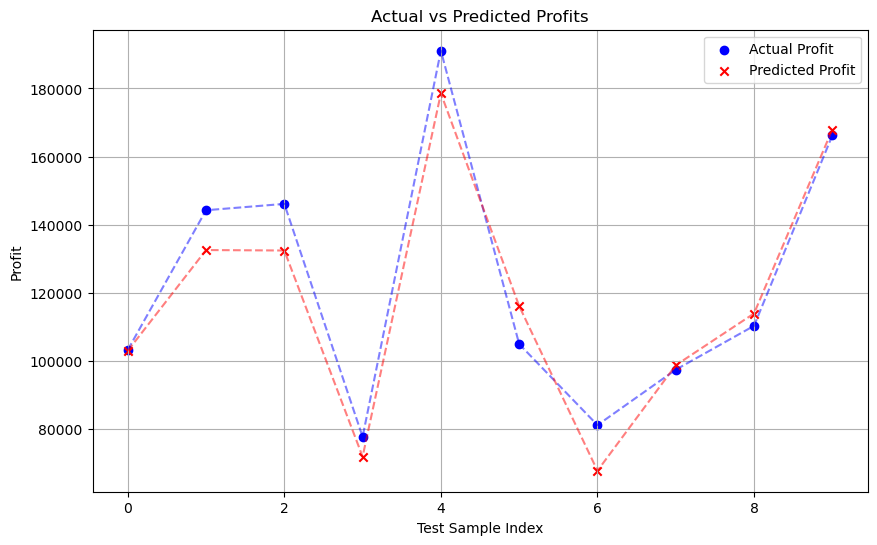

In [ ]:
# Visualizing Actual vs Predicted Profit Values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Profit')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Profit')
plt.plot(range(len(y_test)), y_test, linestyle='dashed', color='blue', alpha=0.5)
plt.plot(range(len(y_pred)), y_pred, linestyle='dashed', color='red', alpha=0.5)

plt.xlabel("Test Sample Index")
plt.ylabel("Profit")
plt.title("Actual vs Predicted Profits")
plt.legend()
plt.show()

---
Thank You